In [3382]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3777]:
df = pd.read_csv("Sales_Data_Project.csv")

In [3779]:
df.head(2)

,Order_ID,Date,Customer_ID,Region,Product_Category,Product_Name,Unit_Price,Quantity,Total_Price,Payment_Mode,Delivery_Time (days),Customer_Rating
0,1001,2024-06-29,C209,North,Electronics,Smartphone,890.04,1,890.04,UPI,3,4.5
1,1002,2025-03-02,C618,North,Clothing,Jacket,3799.27,1,3799.27,Online,8,3.1


In [3781]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order_ID              500 non-null    int64  
 1   Date                  500 non-null    object 
 2   Customer_ID           500 non-null    object 
 3   Region                500 non-null    object 
 4   Product_Category      500 non-null    object 
 5   Product_Name          500 non-null    object 
 6   Unit_Price            500 non-null    float64
 7   Quantity              500 non-null    int64  
 8   Total_Price           500 non-null    float64
 9   Payment_Mode          500 non-null    object 
 10  Delivery_Time (days)  500 non-null    int64  
 11  Customer_Rating       454 non-null    float64
dtypes: float64(3), int64(3), object(6)
memory usage: 47.0+ KB


In [3785]:
df.Customer_Rating.unique()

array([4.5, 3.1, 3.3, 2.9, 3.6, 4.4, 2.8, nan, 3.2, 4.1, 4.9, 4.2, 4.7,
       4.6, 4. , 2.6, 4.3, 3.9, 3.7, 3.5, 2.7, 4.8, 3. , 2.5, 3.8, 3.4,
       5. ])

# Filling Mean To Missing Valuses in Customer_Rating

In [3788]:
df['Customer_Rating'].fillna(df['Customer_Rating'].mean(),inplace = True) 
df['Customer_Rating']= df['Customer_Rating'].round(1)
df['Customer_Rating'].unique()

array([4.5, 3.1, 3.3, 2.9, 3.6, 4.4, 2.8, 3.8, 3.2, 4.1, 4.9, 4.2, 4.7,
       4.6, 4. , 2.6, 4.3, 3.9, 3.7, 3.5, 2.7, 4.8, 3. , 2.5, 3.4, 5. ])

# Date 

In [3791]:
df["Date"]= pd.to_datetime(df.Date)

# Year

In [3794]:
df['Year'] = df.Date.dt.year

In [3796]:
df.Year.unique()

array([2024, 2025])

# Month

In [3799]:
df["Month"] = df.Date.dt.month

In [3800]:
df = df.sort_values("Month", ascending=True)
df.Month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

# Week Days 

In [3802]:
df["WeekDays"] = df.Date.dt.day_name()

In [3803]:
df.WeekDays.unique()

array(['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [3804]:
df.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Region', 'Product_Category',
       'Product_Name', 'Unit_Price', 'Quantity', 'Total_Price', 'Payment_Mode',
       'Delivery_Time (days)', 'Customer_Rating', 'Year', 'Month', 'WeekDays'],
      dtype='object')

# Spender Category 

In [3808]:
print("Max Spender",df.Total_Price.max())
print("Min Spender",df.Total_Price.min())
print("Median Spender",df.Total_Price.median())


Max Spender 24838.5
Min Spender 101.03
Median Spender 5461.05


In [3810]:
conditions = [(df["Total_Price"] <= 5461.05),
              (df["Total_Price"] >= 5461.05 )& (df["Total_Price"] < 14838.5 ),
              (df["Total_Price"] >=14838.5 )
             ]
choices= ["Less","Medium","High"]

df["Spender_Category"] = np.select(conditions,choices)

In [3813]:
df.Spender_Category.unique()

array(['Less', 'Medium', 'High'], dtype=object)

In [3814]:
df.columns

Index(['Order_ID', 'Date', 'Customer_ID', 'Region', 'Product_Category',
       'Product_Name', 'Unit_Price', 'Quantity', 'Total_Price', 'Payment_Mode',
       'Delivery_Time (days)', 'Customer_Rating', 'Year', 'Month', 'WeekDays',
       'Spender_Category'],
      dtype='object')

In [3815]:
df = df[['Order_ID', 'Customer_ID', 'Spender_Category','Date','Year', 'Month', 'WeekDays', 'Region', 'Product_Category',
       'Product_Name', 'Unit_Price', 'Quantity', 'Total_Price', 'Payment_Mode',
       'Delivery_Time (days)', 'Customer_Rating']]

In [3816]:
df.columns
df.Product_Name.unique()

array(['Table', 'Magazine', 'Bluetooth Ear', 'Tomatoes', 'Milk',
       'Textbook', 'Comics', 'Tablet', 'Sweater', 'Apples', 'Charger',
       'Eggs', 'Novel', 'T-Shirt', 'Desk', 'Jacket', 'Bread', 'Jeans',
       'Speaker', 'Bookshelf', 'Couch', 'Socks', 'Smartphone',
       'Office Chair', 'Notebook'], dtype=object)

<!-- # Average Unit Price By Products -->

# Average Unit Price by Selected Product 

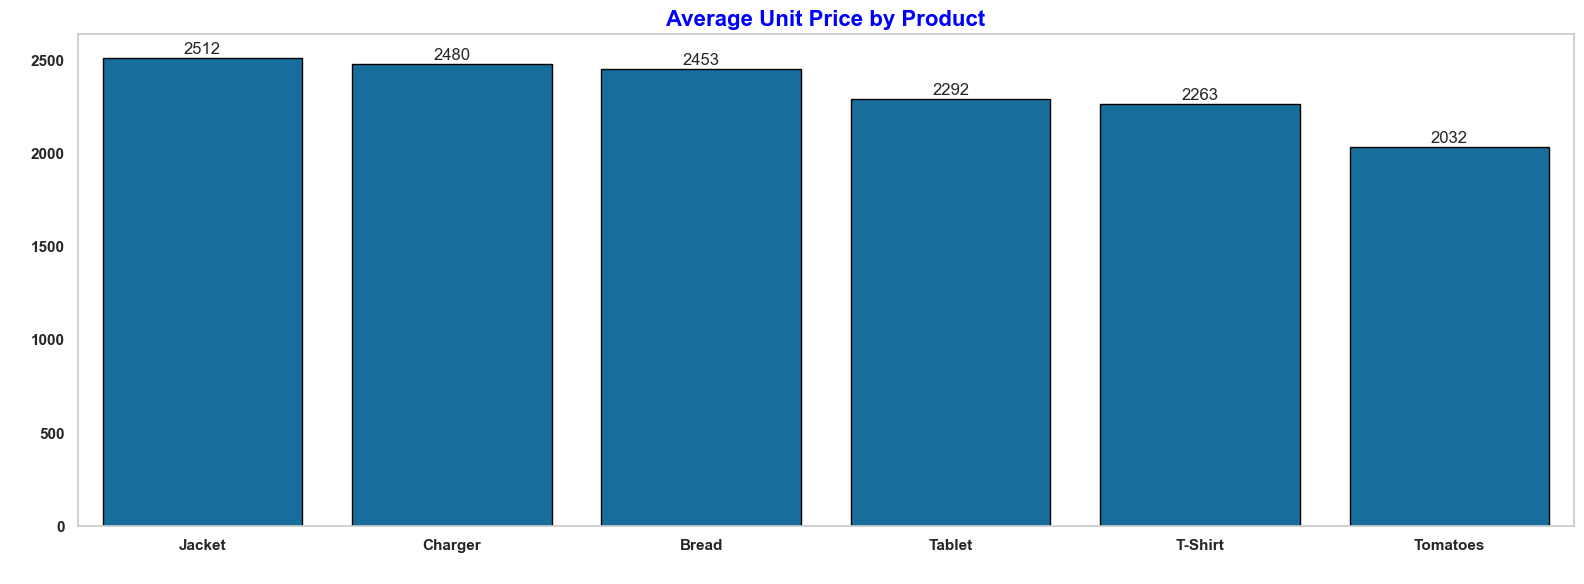

In [4573]:
selected_Product = ['Jacket', 'Tomatoes', 'Tablet', 'Bread', 'Charger','T-Shirt']

filtered_df = df[df['Product_Name'].isin(selected_Product)]


grouped = filtered_df.groupby("Product_Name")["Unit_Price"].mean().sort_values(ascending=False)

finaldf = grouped.reset_index()

plt.figure(figsize=(16,6)) 
sns.set_palette("colorblind")

ax = sns.barplot(
    data=finaldf,
    x="Product_Name",
    y="Unit_Price",
    edgecolor = 'black'
)

for x in ax.containers:
    ax.bar_label(x,fmt="%.0f", padding = 1)

plt.title("Average Unit Price by Product", fontweight='bold',fontsize = 16 ,color = 'blue')
plt.xticks(rotation=0,fontweight = 'bold') 
plt.yticks(fontweight = 'bold')
plt.xlabel(" ")
plt.ylabel(" ")
plt.grid(False)
plt.tight_layout()
plt.show()

# Total Quantity Sold by Product Category

In [3827]:
df.Product_Category.unique()

array(['Furniture', 'Books', 'Electronics', 'Groceries', 'Clothing'],
      dtype=object)

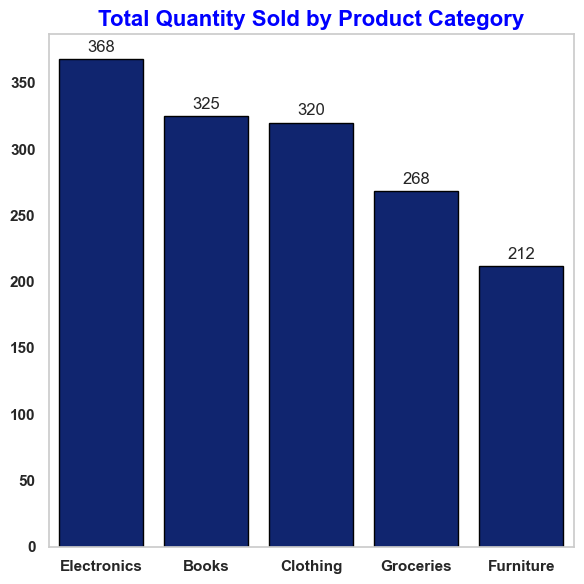

In [4581]:
grouped = df.groupby("Product_Category")["Quantity"].sum().sort_values(ascending=False)

finaldf = grouped.reset_index()

plt.figure(figsize=(6, 6))
sns.set_palette("dark")

ax = sns.barplot(
    data=finaldf,
    x="Product_Category",
    y="Quantity",
    edgecolor='black',
)

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)

plt.title("Total Quantity Sold by Product Category", fontweight='bold', fontsize=16, color='blue')
plt.xticks(rotation=0, fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel("")
plt.ylabel("")
plt.grid(False)

plt.tight_layout()
plt.show()

# Total Sale by Selected Products

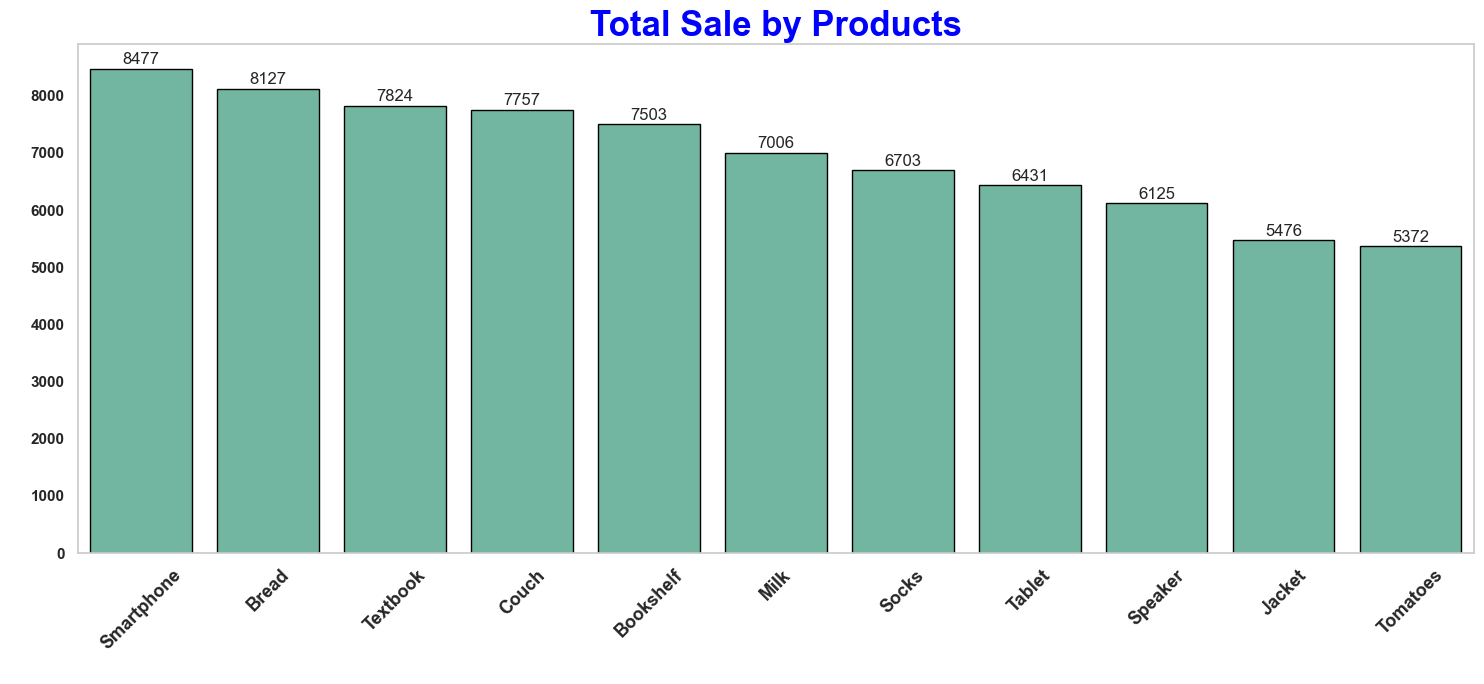

In [4579]:
selected_Product = ['Smartphone', 'Jacket', 'Tomatoes', 'Tablet', 'Textbook', 'Couch',
       'Bookshelf', 'Milk', 'Socks', 'Speaker', 'Bread']

filtered_df = df[df['Product_Name'].isin(selected_Product)]


groupby = filtered_df.groupby("Product_Name")["Total_Price"].mean().sort_values(ascending=False)

finaldf = groupby.reset_index()

plt.figure(figsize=(15,7)) 
sns.set_palette("Set2")

ax = sns.barplot(
    data=finaldf,
    x="Product_Name",
    y="Total_Price",
    edgecolor = 'black',
)

for x in ax.containers:
    ax.bar_label(x,fmt="%.0f", padding = 1)

plt.title("Total Sale by Products", fontweight='bold',fontsize = 25 ,color = 'blue')
plt.xticks(rotation=45,fontweight = 'bold',fontsize = 13) 
plt.yticks(fontweight = 'bold',)
plt.xlabel(" ")
plt.ylabel(" ")
plt.grid(False)  
plt.tight_layout()
plt.show()


# Sales By Spender Category

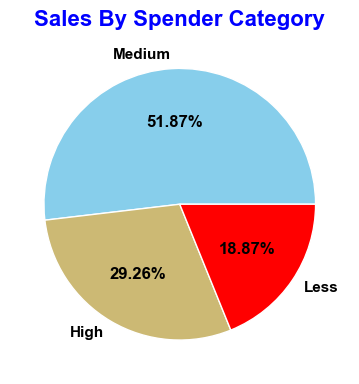

In [4461]:
grouped= df.groupby("Spender_Category")['Total_Price'].sum().sort_values(ascending= False)
plt.figure(figsize=(6, 4))
plt.pie(grouped.values,
        labels=grouped.index,
        autopct="%2.2f%%",
        colors= ['skyblue','y','red'],
       textprops ={"weight":"bold",
                  'color':'black'},   
       )
# plt.legend(title="Payment Mode", loc = 'upper left')
plt.title("Sales By Spender Category", fontsize =16, fontweight ='bold',color = 'blue')
plt.tight_layout()
plt.show()

# Total Sales by Month

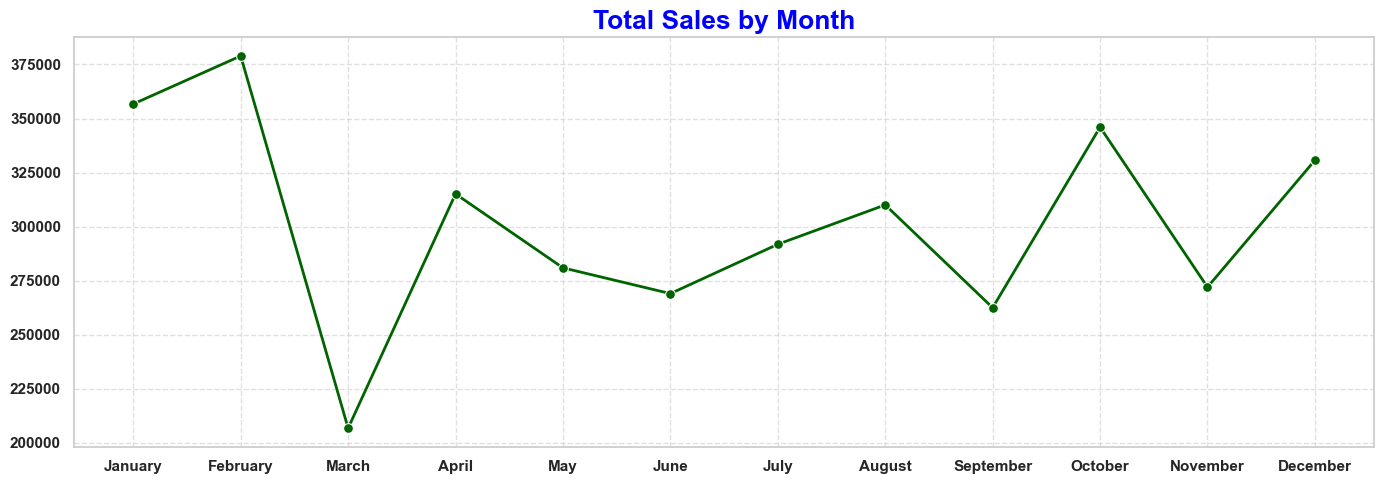

In [4415]:
grouped_df = df.groupby("Month")['Total_Price'].sum().reset_index()

plt.figure(figsize=(14, 5))

sns.lineplot(data=grouped_df,
             x='Month',
             y='Total_Price',
             color='darkgreen',
             marker='o',
             linewidth=2,
             markersize=7)

plt.title("Total Sales by Month", fontsize=19, fontweight='bold',color = 'blue')

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(rotation=0, ticks = range(1,13), labels = month_order,fontweight='bold')

plt.yticks(fontweight='bold')
plt.ylabel('')
plt.xlabel("")
plt.grid(True, linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

# Total Sale By Weekdays"

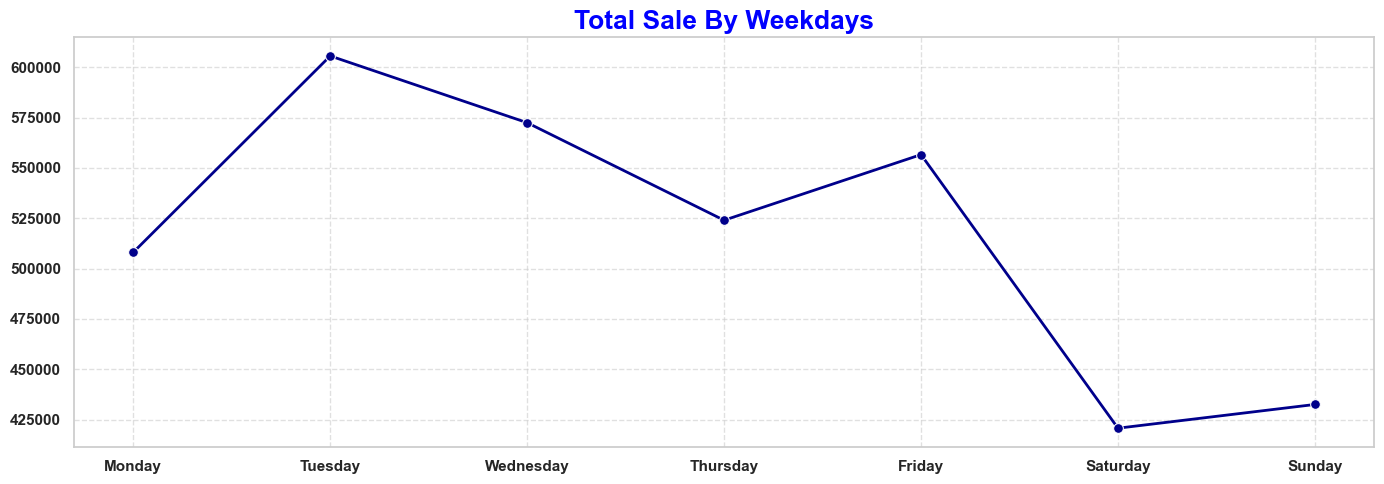

In [4467]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df['WeekDays'] = pd.Categorical(df['WeekDays'],
                                categories=weekday_order,
                                ordered=True)

grouped_df = df.groupby("WeekDays")['Total_Price'].sum().reset_index()

plt.figure(figsize=(14, 5))

sns.lineplot(data=grouped_df,
             x='WeekDays',
             y='Total_Price',
             color='darkblue',
             marker='o',
             linewidth=2,
             markersize=7)

plt.title("Total Sale By Weekdays", fontsize=19, fontweight='bold',color = 'blue')

plt.xticks(rotation=0,fontweight='bold')

plt.yticks(fontweight='bold')
plt.ylabel('')
plt.xlabel("")
plt.grid(True, linestyle='--', alpha=0.6)  
plt.tight_layout()
plt.show()

# Sale Cut-down by Spender Category

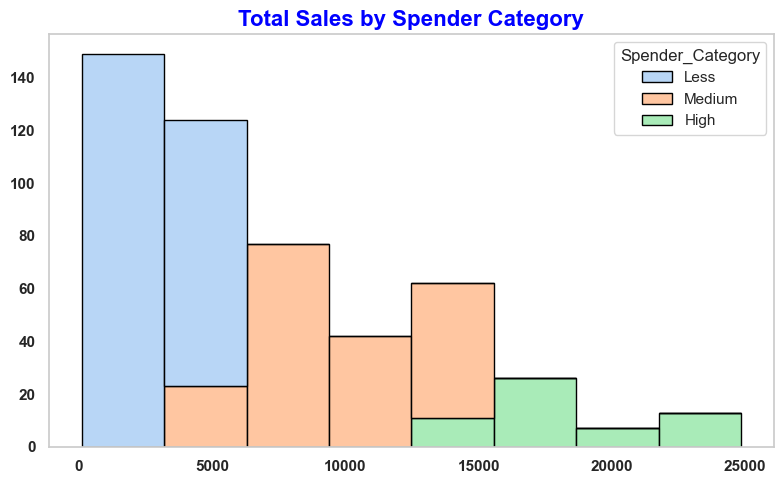

In [4521]:
plt.figure(figsize=(8, 5))
sns.set_palette("pastel")
sns.histplot(
    data=df,
    x='Total_Price',
    hue='Spender_Category',
    bins=8,
    multiple='stack',
    edgecolor='black'           
)

plt.title("Total Sales by Spender Category", color = 'blue', fontsize = 16, fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.grid(False)
plt.tight_layout()
plt.show()


# Average Unit Price by Selected Product to Region

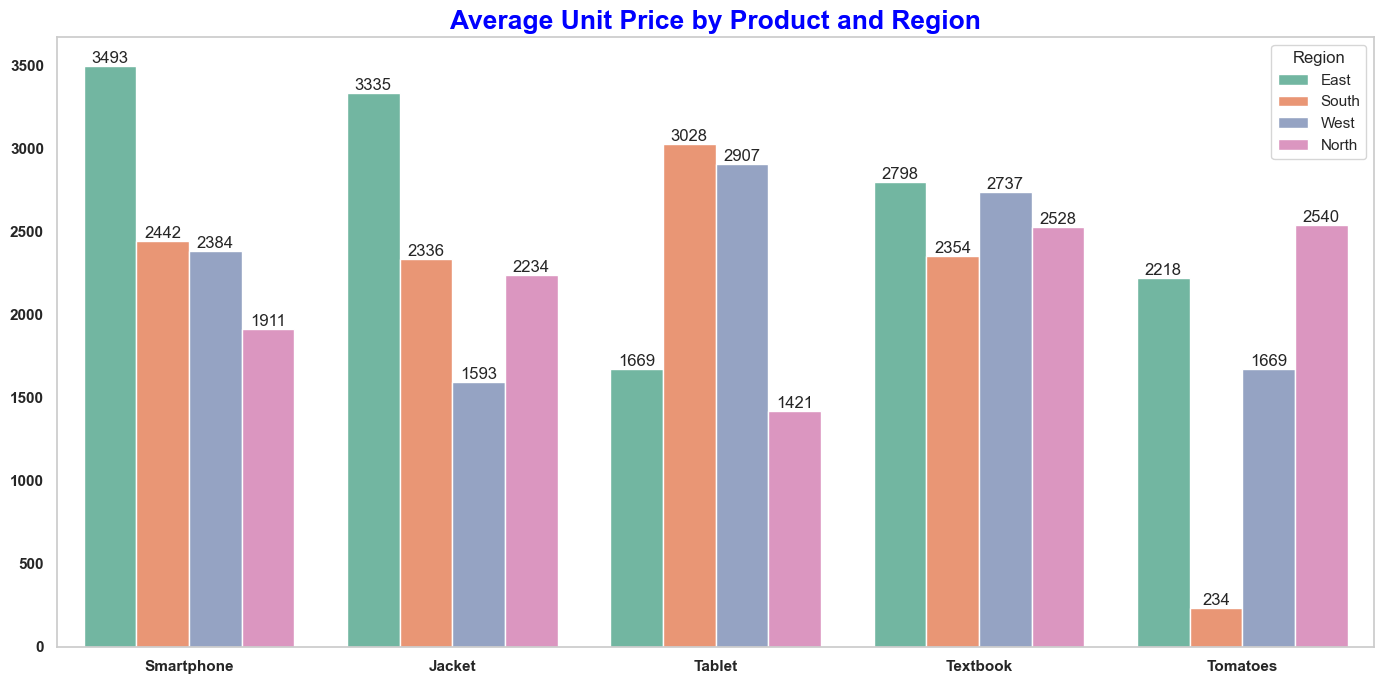

In [4485]:
selected_Product = ['Smartphone', 'Jacket', 'Tomatoes', 'Tablet', 'Textbook']

filtered_df = df[df["Product_Name"].isin(selected_Product)]

grouped= filtered_df.groupby(["Region", "Product_Name"])['Unit_Price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 7))

ax = sns.barplot(
    data=grouped,
    x="Product_Name",
    y="Unit_Price",
    hue="Region",
    estimator = "mean",
    palette="Set2"
)

for i in ax.containers:
    ax.bar_label(i, fmt ="%.0f",padding = 0)
    
plt.title("Average Unit Price by Product and Region", fontweight = 'bold', color ='blue', fontsize = 19)
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontweight = 'bold' )
plt.yticks(fontweight = 'bold' )
plt.grid(False)
plt.tight_layout()
plt.show()


# Average Customer Rating by Region

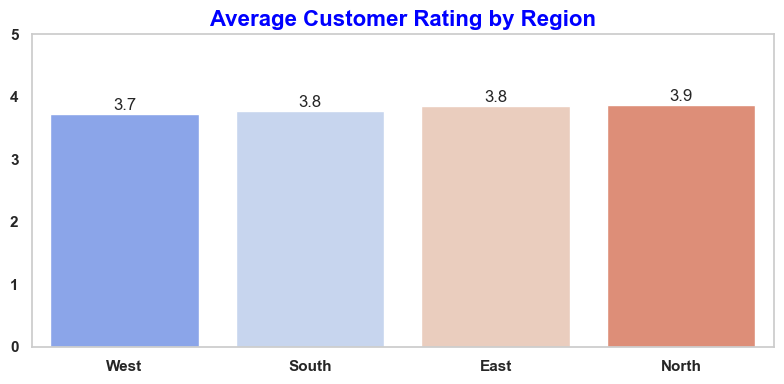

In [4523]:
grouped_ratings = df.groupby("Region")["Customer_Rating"].mean().sort_values(ascending = True)

gfa = grouped_ratings.reset_index()

plt.figure(figsize=(8, 4))

ax = sns.barplot(data=gfa, x="Region", y="Customer_Rating", palette="coolwarm")

for i in ax.containers:
    ax.bar_label(i, fmt ="%.1f",padding = 1)
    
plt.title("Average Customer Rating by Region",color = 'blue', fontsize = 16 , fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.ylim(0, 5)  
plt.xticks( fontweight = 'bold')
plt.yticks( fontweight = 'bold')
plt.grid(False)

plt.tight_layout()
plt.show()


# Average Customer Rating by Delivery Time

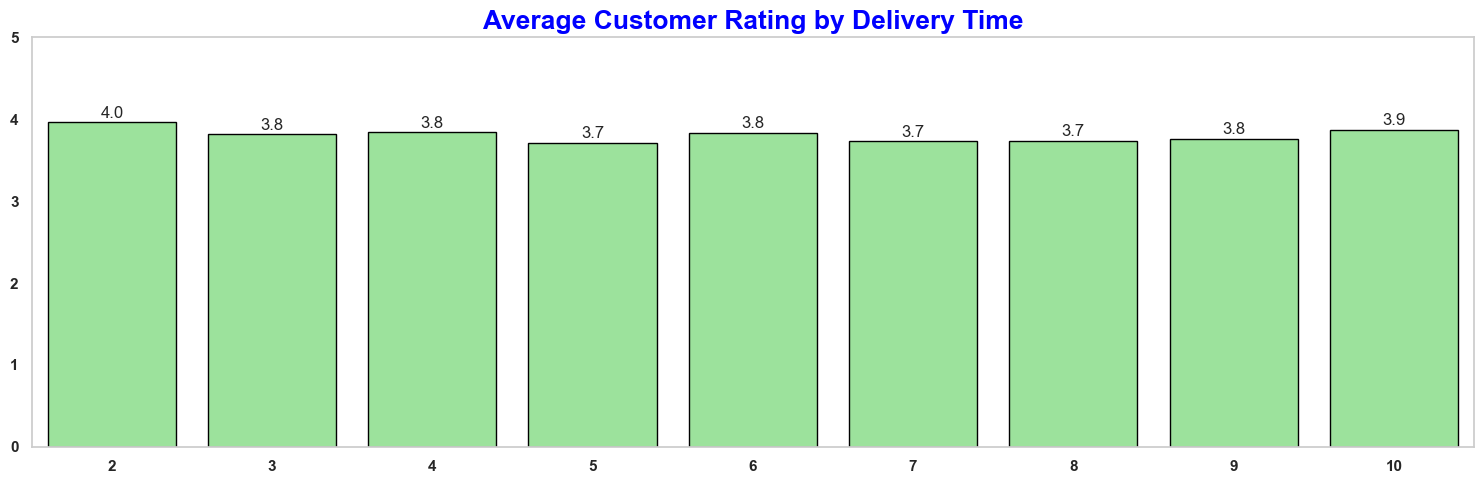

In [4529]:
grouped = df.groupby('Delivery_Time (days)')["Customer_Rating"].mean()

gf = grouped.reset_index()

plt.figure(figsize=(15, 5))

ax = sns.barplot(
    data=gf,
    x="Delivery_Time (days)",
    y="Customer_Rating",
    color="lightgreen",
    edgecolor = "black"
)

for i in ax.containers:
    ax.bar_label(i, fmt ="%.1f",padding = 1)
    
plt.title("Average Customer Rating by Delivery Time", color = 'blue', fontsize = 19 , fontweight = 'bold')
plt.xlabel("")
plt.ylabel("")
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.ylim(0, 5) 
plt.grid(False)
plt.tight_layout()
plt.show()